DCA uses empirical equations that models how the flow rate changes with time assuming a certain decline rate. It 
is one of the most used forms of data analysis to evaluate gas and oil reserves and predict future production. Oil and gas production rates decline as a function of time; loss of reservoir pressure or changing relative volumes of the produced fluids are usually the cause. Fitting a line through the performance history and assuming this trend will continue in the future forms the basis of the DCA concept 
 
This technique is based on the assumption that past production trends and their control factors will continue in the future 
and; therefore, can be extrapolated and described by one of the three mathematical expressions; (1) Exponential 
decline (2) Harmonic decline and (3) Hyperbolic decline. A major assumption here is that the most dominant past 
behavior will govern the future behavior of the well's performance. Obviously, this is not necessarily true but works in 
many cases. It could also yield reasonable results when more wells are lumped together. However, this technique 
ignores any geological information from the field and, therefore, could give very unreasonable results in some cases

There are some factors that affect the trend of production decline. the main factors may include; 

(1) Human factors 
(such as the restriction of the production rate to the allowable rate setup by the regulatory body, restriction due to the 
marketing or shutting down of wells for well testing), 

(2) production conditions (such as changing number of 
producers, changing lifting conditions, changing the productivity index of the well due to acidification, damage, 
hydraulic fracturing or re-perforations), or Change surface conditions (such as changing the well head pressure or 
separator pressure), and 

(3) reservoir factors (such as reservoir drive mechanisms, reservoir fluid and rock properties 
or the use of pressure maintenance, waterflooding and EOR techniques)




In [1]:
import pandas as pd
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
decline_curve=pd.read_excel('C:\\Users\\dell\\Downloads//oilgas.xlsx')
decline_curve.head()

,gas prodcution,time(days),flow rate,time(month)
0,13458.9,30,413.3,1.0
1,25306.6,60,392.8,2.0
2,36322.1,90,375.9,3.0
3,47815.0,120,371.3,4.0
4,60770.6,150,377.5,5.0


In [3]:
import numpy as np
DI_hyper=((375.9-392.8)/(2-1))*(2/(375.9+392.8))#formula for finding decline rate hyperbolic 
print('DI_hyper:',DI_hyper)
DI_harm=(1/2)*(413.3/392.8)#harmonic
print('DI_harm:',DI_harm)
DI_exp=(1/(2-1))*(np.log(413.3/392.8))#exponential
print('DI_exp:',DI_exp)


DI_hyper: -0.043970339534278736
DI_harm: 0.5260947046843177
DI_exp: 0.05087314503737589


In [4]:
b2=1#harmonic
b3=0#exponential

In [5]:
b=0.6#hyperbolic 
qi=413.3
qi

413.3

checking trend exponential log(q)vs t or q vs np straight line and harmonic log(q)vs log(t) or np vs log(q) straight line other wise heper bolic

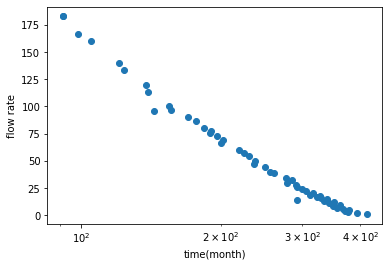

In [6]:
plt.scatter(decline_curve['flow rate'],decline_curve['time(month)'])#exponential
plt.xlabel('time(month)')
plt.ylabel('flow rate')
plt.xscale('log')
#plt.xscale('log')
#it's alomost straight line 

Text(0.5, 0, 'flow rate')

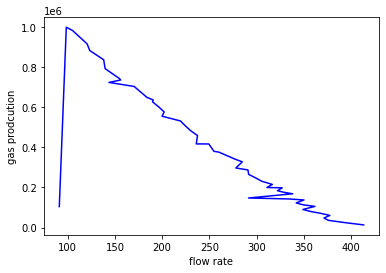

In [7]:
plt.plot(decline_curve['flow rate'],decline_curve['gas prodcution'],'b')#exponential
plt.ylabel('gas prodcution')
plt.xlabel('flow rate')
#plt.yscale('log')
#plt.xscale('log')


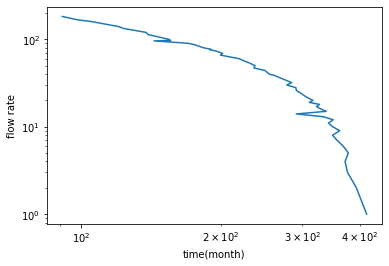

In [8]:
plt.plot(decline_curve['flow rate'],decline_curve['time(month)'])#harmonic
plt.xlabel('time(month)')
plt.ylabel('flow rate')
plt.yscale('log')
plt.xscale('log')

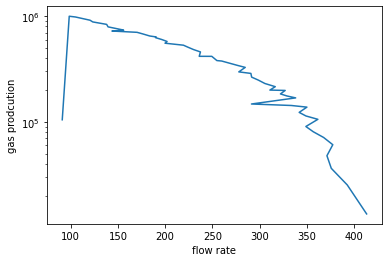

In [9]:
plt.plot(decline_curve['flow rate'],decline_curve['gas prodcution'])#harmonic
plt.xlabel('flow rate')
plt.ylabel('gas prodcution')
plt.yscale('log')
#plt.xscale('log')

let's use exponential trend

In [13]:
decline_curve['arps rate3']=qi/(np.exp(DI_exp*decline_curve['time(month)']))
decline_curve.head(1)

,gas prodcution,time(days),flow rate,time(month),arps rate3,arps cum gas prod3
0,13458.9,30,413.3,1.0,392.8,402.963095


In [14]:
decline_curve['arps cum gas prod3']=(qi-decline_curve['arps rate3'])/DI_exp
decline_curve.head()
df=decline_curve.copy()
df['time(month)']=df['time(month)'].astype(int)
df.head()

,gas prodcution,time(days),flow rate,time(month),arps rate3,arps cum gas prod3
0,13458.9,30,413.3,1,392.800000,402.963095
1,25306.6,60,392.8,2,373.316816,785.938909
2,36322.1,90,375.9,3,354.800013,1149.918826
3,47815.0,120,371.3,4,337.201657,1495.845058
4,60770.6,150,377.5,5,320.476194,1824.613080


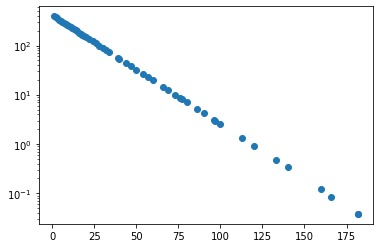

In [15]:
plt.scatter(df['time(month)'],(df['arps rate3']))
plt.yscale('log')

In [16]:
x=df['time(month)']
y=np.log10(df['arps rate3'])
poly=np.polyfit(df['time(month)'],np.log10(df['arps rate3']),1)
poly
#poly=np.polyfit(df['Porosity'],np.log10(df['Permeability_Horz']),1)

array([-0.02214441,  2.6177522 ])

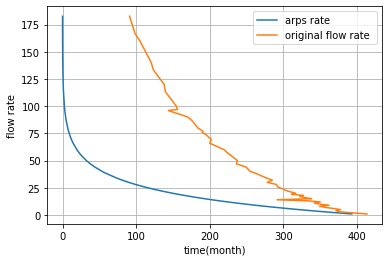

In [27]:
plt.plot(decline_curve['arps rate3'],decline_curve['time(month)'],label='arps rate')
plt.plot(decline_curve['flow rate'],decline_curve['time(month)'],label='original flow rate ')
plt.xlabel('time(month)')
plt.ylabel('flow rate')
plt.legend()
#plt.xscale('log')
plt.grid()

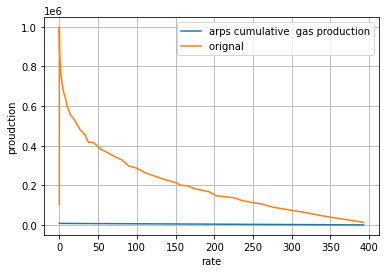

In [28]:
plt.plot(decline_curve['arps rate3'],decline_curve['arps cum gas prod3'],label='arps cumulative  gas production')
plt.plot(decline_curve['arps rate3'],decline_curve['gas prodcution'],label='orignal ')
plt.xlabel('rate')
plt.ylabel('proudction')
plt.legend()
plt.grid()

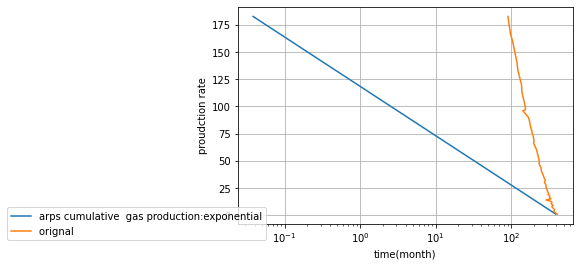

In [42]:
plt.plot(decline_curve['arps rate3'],decline_curve['time(month)'],label='arps cumulative  gas production:exponential')
plt.plot(decline_curve['flow rate'],decline_curve['time(month)'],label='orignal ')
plt.xlabel('time(month)')
plt.ylabel('proudction rate')
plt.legend()
plt.grid()
plt.xscale('log')
plt.legend(loc='upper right' ,bbox_to_anchor=(0.1,0.1))

harmonic 


In [29]:
decline_curve['arps rate2']=qi/(1+DI_harm*decline_curve['time(month)'])
decline_curve.head(1)

,gas prodcution,time(days),flow rate,time(month),arps rate3,arps cum gas prod3,arps rate2
0,13458.9,30,413.3,1.0,392.8,402.963095,270.821987


In [31]:
import numpy as np
decline_curve['arps cum gas prod2']=(qi/DI_harm)*(np.log(qi/decline_curve['time(month)']))
decline_curve.head()

,gas prodcution,time(days),flow rate,time(month),arps rate3,arps cum gas prod3,arps rate2,arps cum gas prod2
0,13458.9,30,413.3,1.0,392.800000,402.963095,270.821987,4732.590876
1,25306.6,60,392.8,2.0,373.316816,785.938909,201.394666,4188.054451
2,36322.1,90,375.9,3.0,354.800013,1149.918826,160.300410,3869.521062
3,47815.0,120,371.3,4.0,337.201657,1495.845058,133.134525,3643.518026
4,60770.6,150,377.5,5.0,320.476194,1824.613080,113.841899,3468.216452


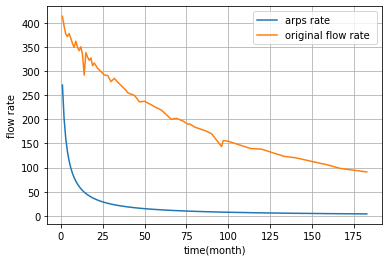

In [32]:
plt.plot(decline_curve['time(month)'],decline_curve['arps rate2'],label='arps rate')
plt.plot(decline_curve['time(month)'],decline_curve['flow rate'],label='original flow rate ')
plt.xlabel('time(month)')
plt.ylabel('flow rate')
plt.legend()
plt.grid()

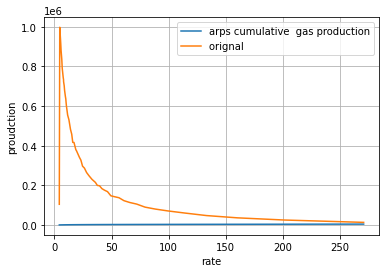

In [33]:
plt.plot(decline_curve['arps rate2'],decline_curve['arps cum gas prod2'],label='arps cumulative  gas production')
plt.plot(decline_curve['arps rate2'],decline_curve['gas prodcution'],label='orignal ')
plt.xlabel('rate')
plt.ylabel('proudction')
#plt.yscale('log')
#plt.xscale('log')

plt.legend()
plt.grid()

hyperbolic

In [34]:
decline_curve['arps rate']=qi/(1+(b*DI_hyper*decline_curve['time(month)']))**(1/b)
decline_curve.head(5)

,gas prodcution,time(days),flow rate,time(month),arps rate3,arps cum gas prod3,arps rate2,arps cum gas prod2,arps rate
0,13458.9,30,413.3,1.0,392.800000,402.963095,270.821987,4732.590876,432.133464
1,25306.6,60,392.8,2.0,373.316816,785.938909,201.394666,4188.054451,452.378606
2,36322.1,90,375.9,3.0,354.800013,1149.918826,160.300410,3869.521062,474.185119
3,47815.0,120,371.3,4.0,337.201657,1495.845058,133.134525,3643.518026,497.723501
4,60770.6,150,377.5,5.0,320.476194,1824.613080,113.841899,3468.216452,523.188672


In [36]:
decline_curve['arps cumulative  gas production']=(qi/(DI_hyper*(1-b)))*(((-1+(decline_curve['arps rate'])/qi))**(1-b))
decline_curve.head(5)

,gas prodcution,time(days),flow rate,time(month),arps rate3,arps cum gas prod3,arps rate2,arps cum gas prod2,arps rate,arps cumulative gas production
0,13458.9,30,413.3,1.0,392.800000,402.963095,270.821987,4732.590876,432.133464,-6831.428368
1,25306.6,60,392.8,2.0,373.316816,785.938909,201.394666,4188.054451,452.378606,-9147.766234
2,36322.1,90,375.9,3.0,354.800013,1149.918826,160.300410,3869.521062,474.185119,-10923.049370
3,47815.0,120,371.3,4.0,337.201657,1495.845058,133.134525,3643.518026,497.723501,-12448.722234
4,60770.6,150,377.5,5.0,320.476194,1824.613080,113.841899,3468.216452,523.188672,-13833.134606


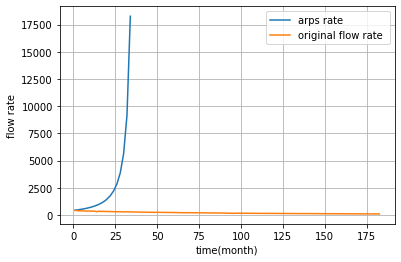

In [37]:
plt.plot(decline_curve['time(month)'],decline_curve['arps rate'],label='arps rate')
plt.plot(decline_curve['time(month)'],decline_curve['flow rate'],label='original flow rate ')
plt.xlabel('time(month)')
plt.ylabel('flow rate')
plt.legend()
plt.grid()

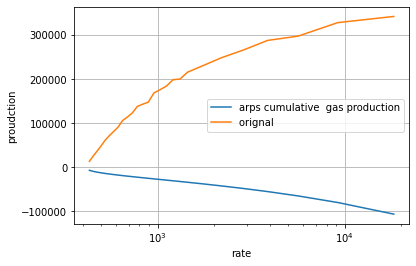

In [38]:
plt.plot(decline_curve['arps rate'],decline_curve['arps cumulative  gas production'],label='arps cumulative  gas production')
plt.plot(decline_curve['arps rate'],decline_curve['gas prodcution'],label='orignal ')
plt.xlabel('rate')
plt.ylabel('proudction')
#plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

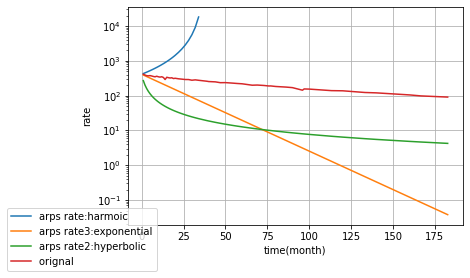

In [39]:
plt.plot(decline_curve['time(month)'],decline_curve['arps rate'],label='arps rate:harmoic')
plt.plot(decline_curve['time(month)'],decline_curve['arps rate3'],label='arps rate3:exponential')
plt.plot(decline_curve['time(month)'],decline_curve['arps rate2'],label='arps rate2:hyperbolic')
plt.plot(decline_curve['time(month)'],decline_curve['flow rate'],label='orignal ')
plt.xlabel('time(month)')
plt.ylabel('rate')
plt.yscale('log')
#plt.xscale('log')

plt.legend()
plt.grid()
plt.legend(loc='upper right' ,bbox_to_anchor=(0.1,0.1))

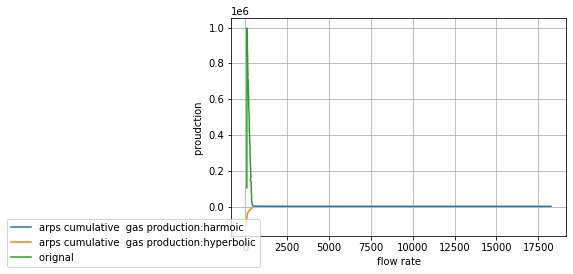

In [41]:
plt.plot(decline_curve['arps rate'],decline_curve['arps cum gas prod2'],label='arps cumulative  gas production:harmoic')
#plt.plot(decline_curve['arps rate3'],decline_curve['arps cum gas prod3'],label='arps cumulative  gas production:exponential')
plt.plot(decline_curve['arps rate3'],decline_curve['arps cumulative  gas production'],label='arps cumulative  gas production:hyperbolic')
plt.plot(decline_curve['flow rate'],decline_curve['gas prodcution'],label='orignal ')
plt.xlabel('flow rate')
plt.ylabel('proudction ')
#plt.yscale('log')
#plt.xscale('log')

plt.legend()
plt.grid()
plt.legend(loc='upper right' ,bbox_to_anchor=(0.1,0.1))

In [4]:
time_month=np.array(decline_curve['time(month)'])
dt=[]
for i in range(len(time_month)):
    if i==0:
        dt.append(time_month[i])
    else:
        dt.append(time_month[i]-time_month[i-1])
dt=np.array(dt)
decline_curve['dt']=dt
decline_curve.head()

    


,gas prodcution,time(days),flow rate,time(month),dt
0,13458.9,30,413.3,1.0,1.0
1,25306.6,60,392.8,2.0,1.0
2,36322.1,90,375.9,3.0,1.0
3,47815.0,120,371.3,4.0,1.0
4,60770.6,150,377.5,5.0,1.0


In [5]:
flow_rate=np.array(decline_curve['flow rate'])
dq=[]
for j in range(len(flow_rate)):
    if j==0:
        dq.append(flow_rate[j])
    else:
        dq.append(flow_rate[j]-flow_rate[j-1])
dt=np.array(dq)
decline_curve['dq']=dq
decline_curve.head()


,gas prodcution,time(days),flow rate,time(month),dt,dq
0,13458.9,30,413.3,1.0,1.0,413.3
1,25306.6,60,392.8,2.0,1.0,-20.5
2,36322.1,90,375.9,3.0,1.0,-16.9
3,47815.0,120,371.3,4.0,1.0,-4.6
4,60770.6,150,377.5,5.0,1.0,6.2


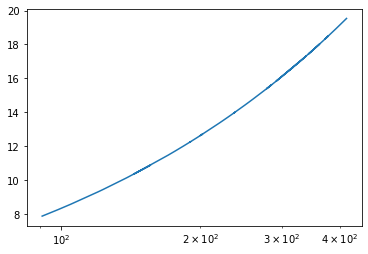

In [30]:
decline_curve['relative decline rate']=(DI2)*(decline_curve['flow rate']**b)
decline_curve.head(1)

